<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/statistics/distributionParametersDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# demonstration of distributions changing as the parameters change

In [1]:
#forward compatibility between python2 and python3
from __future__ import print_function, division
#plotting imports
import pylab as pl
import matplotlib 
from matplotlib import animation
from IPython.display import HTML
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [2]:
#stats imports
import scipy as sp
from scipy import stats

# Binomial distribution:

$k=\textstyle {n \choose k}\, p^k (1-p)^{n-k}$

parameters: 
    - n: number of tries
    - p: probability of success at each try
defines the probability of having N "successes" in a series of n independent identical success/failure experiment. The case of n=1 and p=0.5 is describe a fair coin toss. 

mean: np

variance: np*(1-p)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


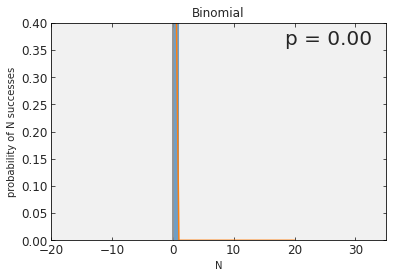

In [3]:
Ndistribs = 20 #number of distributions
ssize = 1000 #sample size

#binomial distribution parameters n,p
n = 20 # n parameter
ps = np.linspace(0, 1.0, n) # p parameter

t = np.linspace(0, n, n+1).astype(int) # x axis
y = np.zeros((Ndistribs, ssize)) #container for the distributions
ls = np.zeros((Ndistribs, len(t))) #container for gaussians corresponding to the distribs

#loop to generate a distribution for each p value
for i,j in enumerate(ps):
    # binomial
    y[i] = sp.stats.binom.rvs(n=n, p=j, size=ssize)
    # gaussian with same mean
    ls[i] = sp.stats.binom.pmf(t, n=n, p=j)
    
#prepare figure
fig, ax = pl.subplots();
ax.axis([-20, 35, 0, 0.4]);

# get and plot histogram of initial distributions
y0 = np.histogram(y[0], bins=t, density=1)[0]
n, bins, patches = plt.hist(y0, bins=t, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
#plot Gaussians
l,= ax.plot(t, ls[i]);

#add label
texts = ax.text(0.70, 0.9,  'p = %.2f'%ps[0], transform=ax.transAxes, 
               fontsize=20)

#line at 0
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
#axis labels
ax.set_title("Binomial")
ax.set_ylabel("probability of N successes")
ax.set_xlabel("N")

#animation function
def animate(i):
    ''' matplotlib animation call
    i: loop iterator
    returns the patches
    '''
    n, _ = np.histogram(y[i], bins=t, density=1)
    for rect, h in zip(patches, n):
        #regenerate histogram
        rect.set_height(h)
    #regenerate gaussian line
    l.set_data(t, ls[i])
    #regenerate label
    texts.set_text('p = %.2f'%ps[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y));
HTML(ani.to_jshtml())

# Poisson distribution:
$k=\frac{\lambda^k}{k!} e^{-\lambda}$

parameters: 
    - lambda: number of tries
A discrete distribution that expresses the probability of a number of events
occurring in a fixed period of time if these events occur with a known average rate
and independently of the time since the last event. More here http://individual.utoronto.ca/zheli/poisson.pdf

mean: lambda

variance: lambda


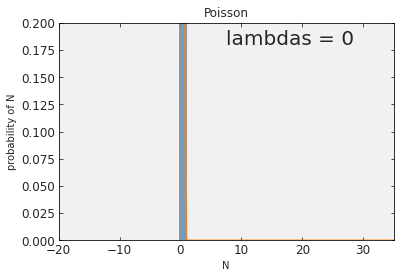

In [9]:
Ndistribs = 20 #number of distributions

#Poisson distribution parameters lambda
n = 20 # n parameter
lambdas = np.linspace(0, Ndistribs-1, Ndistribs).astype(int)# lambda parameter

t = np.linspace(0, n*2, n*2+1).astype(int) # x axis
y = np.zeros((Ndistribs, ssize)) #container for the distributions
ls = np.zeros((Ndistribs, len(t))) #container for gaussians corresponding to the distribs


#loop to generate a distribution for each p value
for i,j in enumerate(lambdas):
    #print(mus[i])
    y[i] = sp.stats.poisson.rvs(size=ssize, mu=j)
    ls[i] = sp.stats.poisson.pmf(t, mu=j)
    #pl.figure()
    #pl.hist(y[i])
    
#prepare figure
fig, ax = pl.subplots();
ax.axis([-n, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = plt.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.50, 0.9,  'lambdas = %d'%lambdas[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Poisson")
ax.set_ylabel("probability of N")
ax.set_xlabel("N")

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    l.set_data(t, ls[i])
    texts.set_text('lambdas = %d'%lambdas[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())

# Gaussian 

$x= \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

parameters:
    - mu: mean
    - sigma: standard deviation
It relates to the Central Limit Theorem:
(Under some conditions which include finite variance) the averages of samples 
of random variables independently drawn from _any_ distributions 
converge in distribution to the normal, i.e., 
they become normally distributed with mean equal to the expected value and 
sdtandard deviation equal to the square root of the mean.

Also referred to Normal if mean is 0 and Standard Normal if mean is 0 and standard deviation is 1

mean: mu

variance: sigma^2

changing mu


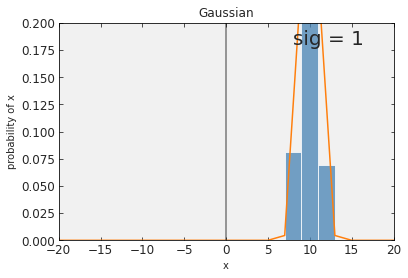

In [10]:
Ndistribs = 21
nminmax = 35
t = np.linspace(-nminmax, nminmax, nminmax+1).astype(int)
y = np.zeros((Ndistribs, ssize))
ls = np.zeros((Ndistribs, len(t)))
sigs = np.linspace(1, Ndistribs, Ndistribs).astype(int) # parameter variance 
mu = 10 # parameter mean

for i,j in enumerate(sigs):
    #print(mus[i])
    y[i] = sp.stats.norm.rvs(size=ssize, loc=mu, scale=j)
    ls[i] = sp.stats.norm.pdf(t, loc=mu, scale=j)
    #pl.figure()
    #pl.hist(y[i])
    
fig, ax = pl.subplots()
ax.axis([-20, 20, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = plt.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'sig = %d'%sigs[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Gaussian")
ax.set_ylabel("probability of x")
ax.set_xlabel("x")

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    l.set_data(t, ls[i])
    texts.set_text('sig = %d'%sigs[i])
    return patches
print(r"changing mu")
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())


changing mu


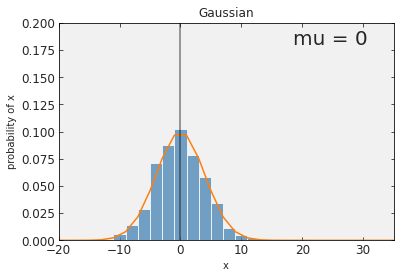

In [6]:
sig = 4
mus = np.linspace(0, 20, 21).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.norm.rvs(size=ssize, loc=j, scale=sig)
    ls[i] = sp.stats.norm.pdf(t, loc=j, scale=sig)
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'mu = %d'%mus[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Gaussian")
ax.set_ylabel("probability of x")
ax.set_xlabel("x")

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('mu = %d'%mus[i])
    l.set_data(t, ls[i])
    return patches

print(r"changing mu")
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())

# Chi Squared 

$x=\frac{1}{2^{\frac{k}{2}}\Gamma\left(\frac{k}{2}\right)}\\; x^{\frac{k}{2}-1} e^{-\frac{x}{2}}$

parameters:
    - k: degrees of freedom
the distribution of a sum of the squares of k independent standard normal random variables. The most common distribution in Null Hypothesis Rejection Testing

mean: k

variance: 2k

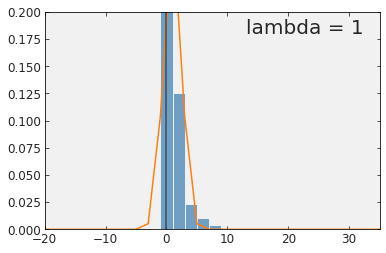

In [7]:
lambdas = np.linspace(1, 20, 20).astype(int)
for i,j in enumerate(lambdas):
    #print(mus[i])
    y[i] = sp.stats.chi2.rvs(size=ssize, df=j)
    ls[i] = sp.stats.norm.pdf(t, loc=j, scale=np.sqrt(2 * lambdas[i]))
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.60, 0.9,  'lambda = %d'%lambdas[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('lambda = %d'%lambdas[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(lambdas))
HTML(ani.to_jshtml())

# Uniform



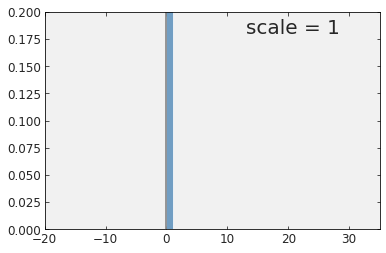

In [8]:
t = np.linspace(-Ndistribs, Ndistribs, Ndistribs*2+1).astype(int)
lambdas = np.linspace(1, Ndistribs, Ndistribs).astype(int)
center = 0
for i,j in enumerate(lambdas):
    #print(mus[i])
    y[i] = sp.stats.uniform.rvs(size=ssize, loc=center, scale=j)
fig, ax = pl.subplots()
ax.axis([-20, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
texts = ax.text(0.60, 0.9,  'scale = %d'%lambdas[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('scale = %d'%lambdas[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())